In [2]:
!pip3 install pandas --break-system-packages

In [3]:
!pip3 install seaborn --break-system-packages

In [4]:
!pip3 install scikit-learn --break-system-packages

In [5]:
# Identify the group with the highest sales and the group with the lowest
# sales based on the data provided.

def sales(data, column):
    grouped_data = data.groupby(column)
    return grouped_data['Sales'].sum()


def sales_normalization(data, column):
    grouped_data = data.groupby(column)
    return grouped_data['sales_normalization'].sum()


def sales_by_time(data, duration):
    if duration == 'month':
        return data['Date'].dt.month
    if duration == 'day_of_week':
        return data['Date'].dt.day_of_week
    if duration == 'quarter':
        return data['Date'].dt.quarter

In [6]:
import seaborn as sb

import matplotlib.pyplot as plt


def bar_plot(data, xcolumn, ycolumn, huecolumn, title):
    plt.figure(figsize=(12, 8))
    sorted_data = data.sort_values([ycolumn], ascending=False)
    sb.barplot(x=xcolumn, y=ycolumn, hue=huecolumn, data=sorted_data)
    plt.title(title)
    plt.show()


def line_plot(grouped_data):
    # Sorting time-of-day sales in descending order
    df_time_sales = grouped_data.sort_values(by="Sales", ascending=False)
    plt.figure(figsize=(10, 6))
    sb.lineplot(data=df_time_sales, x="Time", y="Sales", marker="o", linewidth=2, color="b")
    # sb.lineplot(x=df_time_sales.index, y=grouped_data.values)
    plt.title('Time-of-the-day analysis')
    plt.xlabel('Time of Day')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [7]:
import pandas as pd


def explain(data):
    print(f'Shape : \t{data.shape}')
    print(f'Row Labels : \t{data.index}')
    print(f'Column Names : \n{data.columns}')
    print(f'DataType : \n{data.dtypes}')
    # this returns if there is at least one null value in any of the column data
    print(data.isna().sum(axis=0))
    missing_val = data.isna().sum(axis=0)
    print('column which has null is')
    print(missing_val[missing_val == 1])


def group_by_features(data):
    # %% d. Share your insights regarding the application of the GroupBy() function for
    # either data chunking or merging, and offer a recommendation based on
    # your analysis.
    # Grouping the data by 'State' and 'Time' 'Group' to analyze total sales and units sold
    data_grouped_group = data.groupby(['State', 'Time', 'Group']).agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()
    sorted_group = data_grouped_group.sort_values(by='Sales', ascending=False)
    print('Grouping the data by State and Time Group to analyze total sales and units sold')
    print(sorted_group)
    # Applying standard deviation to the 'Sales' column and creating a new column
    print('Applying standard deviation to the Sales column and creating a new column')
    data["Sales_Std_Dev"] = data.groupby(["State", "Time"])["Sales"].transform("std")
    print(data)
    print(data.select_dtypes(include='int').describe())
    print('Mode of Data')
    print(data.select_dtypes(include='int').mode())
    return data

In [8]:
from sklearn.preprocessing import MinMaxScaler


# TBD C. Choose a suitable data wrangling technique—either data standardization
# or normalization. Execute the preferred normalization method and
# present the resulting data. (Normalization is the preferred approach for this
# problem.)  Normalization (Min-Max Scaling)	When data needs to be in a fixed range (0 to 1)	Xnormalized=Xmax−XminX−Xmin
def min_max_normalization(data, column_name, new_column_name_to_be_added):
    scaler = MinMaxScaler()
    # Apply normalization to 'Sales' column
    data[new_column_name_to_be_added] = scaler.fit_transform(data[[column_name]])
    return data

In [9]:
import pandas as pd


def fill_null(data, column, value):
    return data.fillna({column: value}, inplace=True)


def convert_data_type(data, column, dest_type):
    if dest_type == 'datetime':
        data.Date = pd.to_datetime(column)
        return data

In [10]:
file_path = '../data/AusApparalSales4thQrt2020.csv'

In [11]:
data = pd.read_csv(file_path)

In [12]:
explain(data)

Shape : 	(7560, 6)
Row Labels : 	RangeIndex(start=0, stop=7560, step=1)
Column Names : 
Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')
DataType : 
Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
column which has null is
Series([], dtype: int64)


Shape : 	(7560, 6)
Row Labels : 	RangeIndex(start=0, stop=7560, step=1)
Column Names : 
Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')
DataType : 
Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
column which has null is
Series([], dtype: int64)
After converting datatime datatype
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB
None
after adding sale

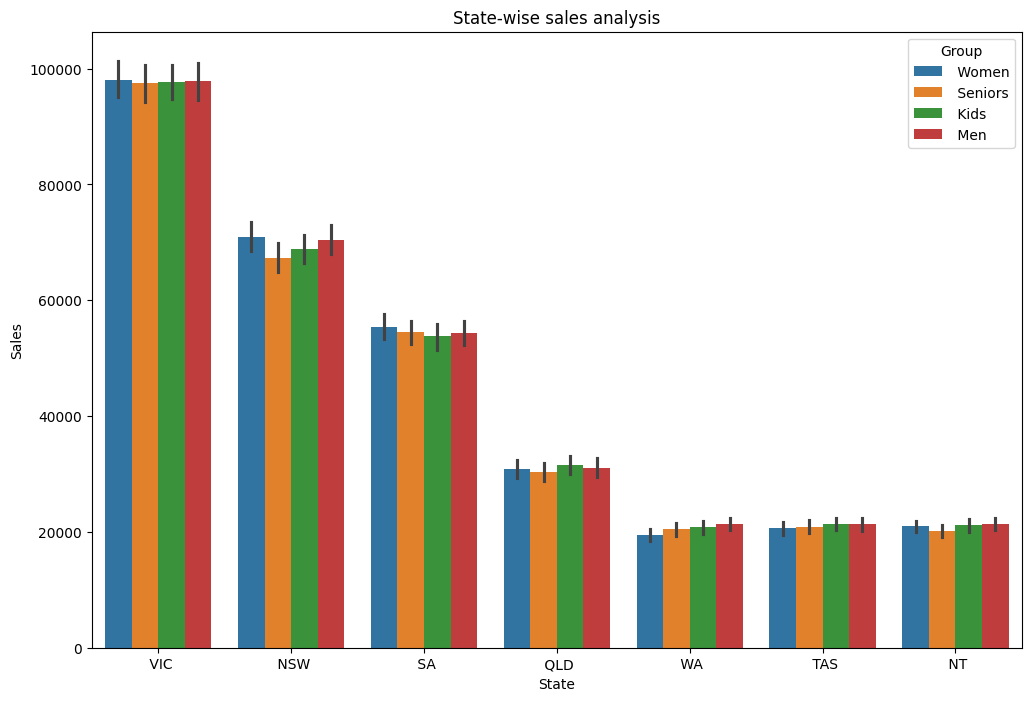

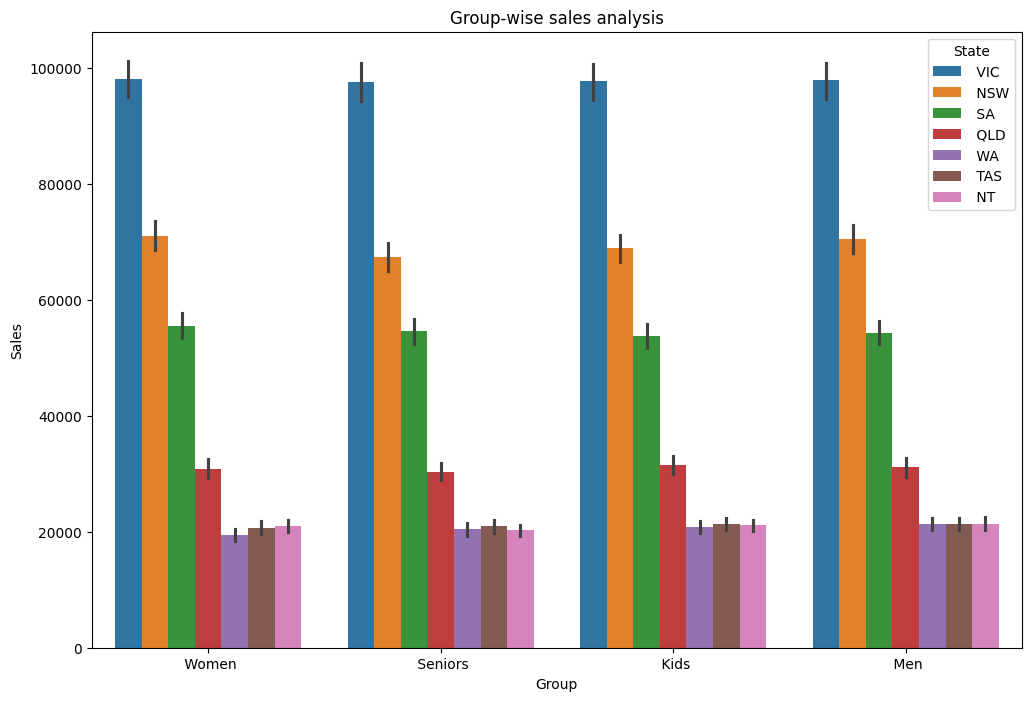

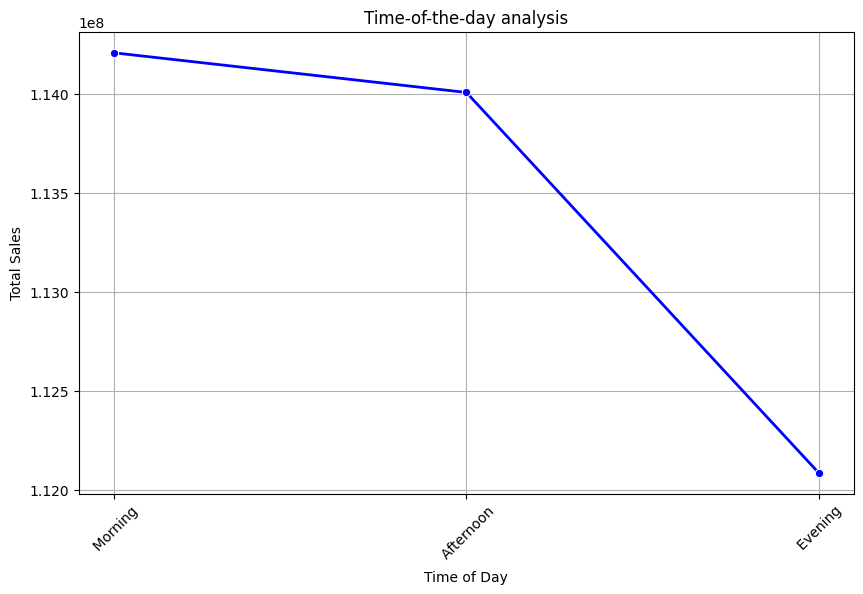

In [13]:
# fill_null(data,'Time','Morning')
# fill_null(data, 'Sales', 20000)
explain(data)
data = convert_data_type(data, data.Date, 'datetime')
print('After converting datatime datatype')
print(data.info())
min_max_normalization(data, 'Sales', 'sales_normalization')
print('after adding sales_normalization')
print(data[['Unit', 'Sales', 'sales_normalization']].agg(['min', 'max']))
group_by_features(data)
grouped_data_by_state = sales(data, 'State')
print(f"Maximum Sales in State={grouped_data_by_state.idxmax()}")
print(f"Minimum Sales in State={grouped_data_by_state.idxmin()}")
grouped_data_by_group = sales(data, 'Group')
print(f"Maximum Sales by Group={grouped_data_by_group.idxmax()}")
print(f"Minimum Sales by Group={grouped_data_by_group.idxmin()}")

grouped_data_by_state_normalization = sales_normalization(data, 'State')
print(f"Maximum Sales using normalization in State={grouped_data_by_state_normalization.idxmax()}")
print(f"Minimum Sales using normalization in State={grouped_data_by_state_normalization.idxmin()}")
grouped_data_by_group_normalization = sales_normalization(data, 'Group')
print(f"Maximum Sales using normalization by Group={grouped_data_by_group_normalization.idxmax()}")
print(f"Minimum Sales using normalization by Group={grouped_data_by_group_normalization.idxmin()}")

monthly_report = sales_by_time(data, 'month')
print(f"Monthly Sales={data.groupby(monthly_report)['Sales'].sum()}")
weekly_report = sales_by_time(data, 'day_of_week')
print(f"Weekly Sales={data.groupby(weekly_report)['Sales'].sum()}")
quarterly_report = sales_by_time(data, 'quarter')
print(f"Quarterly Sales={data.groupby(quarterly_report)['Sales'].sum()}")

monthly_report_sales_normalization = sales_by_time(data, 'month')
print(f"Monthly sales_normalization={data.groupby(monthly_report)['sales_normalization'].sum()}")
weekly_report_sales_normalization = sales_by_time(data, 'day_of_week')
print(f"Weekly sales_normalization={data.groupby(weekly_report)['sales_normalization'].sum()}")
quarterly_report_sales_normalization = sales_by_time(data, 'quarter')
print(f"Quarterly sales_normalization={data.groupby(quarterly_report)['sales_normalization'].sum()}")

bar_plot(data, 'State', 'Sales', 'Group', 'State-wise sales analysis')
bar_plot(data, 'Group', 'Sales', 'State', 'Group-wise sales analysis')
sorted_data = data.sort_values(['Time'], ascending=False)
line_plot(sorted_data.groupby('Time')['Sales'].sum().reset_index())